In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\mohit\OneDrive\Desktop\Omdena-Texas-Homelessness\omdena-texas-homelessness\src\data\Strategic_Measure_Number_of_persons_experiencing_homelessness_-_Annual_Sheltered_HMIS_Count.csv")

In [3]:
df.head()

,Demographic Category,Specific Demographic,# in Emergency Shelter,# in Safe Haven,# in Transitional Housing,Total Unduplicated Clients,Fiscal Year,Fiscal Year Start,Fiscal Year End
0,Race,American Indian or Alaskan Native,73,0,1,73,2016,10/01/2015 12:00:00 AM,09/30/2016 12:00:00 AM
1,Race,Asian,40,1,3,42,2016,10/01/2015 12:00:00 AM,09/30/2016 12:00:00 AM
2,Race,Black or African American,1830,19,170,1981,2016,10/01/2015 12:00:00 AM,09/30/2016 12:00:00 AM
3,Race,Native Hawaiian or Other Pacific Islander,15,1,1,16,2016,10/01/2015 12:00:00 AM,09/30/2016 12:00:00 AM
4,Race,White,2278,44,212,2475,2016,10/01/2015 12:00:00 AM,09/30/2016 12:00:00 AM


In [4]:
df.shape

(131, 9)

In [5]:
# Through this we can get to knew how many NAN or NULL data do we have
# Due to this we don't have to fill any data inside our dataset

df.isnull().sum()

Demographic Category          0
Specific Demographic          0
# in Emergency Shelter        0
# in Safe Haven               0
# in Transitional Housing     0
Total Unduplicated Clients    0
Fiscal Year                   0
Fiscal Year Start             0
Fiscal Year End               0
dtype: int64

<AxesSubplot:>

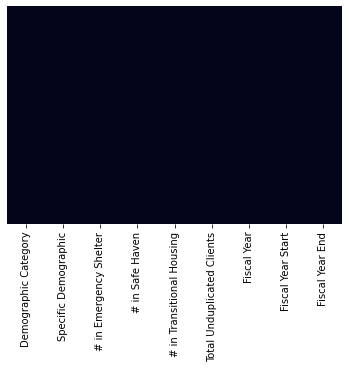

In [6]:
#This is the another way of checking NAN-data, Here if there would been any candle then our dataset surely has some NAN data
sns.heatmap(df.isnull() , yticklabels=False , cbar = False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Demographic Category        131 non-null    object
 1   Specific Demographic        131 non-null    object
 2   # in Emergency Shelter      131 non-null    int64 
 3   # in Safe Haven             131 non-null    int64 
 4   # in Transitional Housing   131 non-null    int64 
 5   Total Unduplicated Clients  131 non-null    int64 
 6   Fiscal Year                 131 non-null    int64 
 7   Fiscal Year Start           131 non-null    object
 8   Fiscal Year End             131 non-null    object
dtypes: int64(5), object(4)
memory usage: 9.3+ KB


In [8]:
values = []
columns = ["Demographic Category","Specific Demographic" ,"# in Emergency Shelter", "# in Safe Haven","# in Transitional Housing" ,"Total Unduplicated Clients","Fiscal Year" , "Fiscal Year Start" ,"Fiscal Year End"]

for i in range(len(columns)):
    values.append(df[columns[i]])


In [9]:
len(values)

9

In [10]:
# Now we can check the all the unique values that are inside our each columns by using

values[0].unique()

array(['Race', 'Ethnicity', 'Gender', 'Veteran Status', 'Age Category',
       'Disability Status', 'Disability', 'Veteran', 'Age'], dtype=object)

In [11]:
# Now let's just check how many unique values do we have inside our each columns

df.nunique()

Demographic Category            9
Specific Demographic           32
# in Emergency Shelter        106
# in Safe Haven                34
# in Transitional Housing      71
Total Unduplicated Clients    110
Fiscal Year                     5
Fiscal Year Start               5
Fiscal Year End                 5
dtype: int64

Thorugh the use of last command we can easily check that some of the columns has very high level of unique values so those columns are of no use for us

In [12]:
# As we have very small amount of columns so we can just manually drop all these columns which has high amount unique values
# We will remove all those columns which do have unique values more than 45

df.drop(["# in Emergency Shelter"] , axis=1 , inplace=True)
df.drop(["# in Transitional Housing"] , axis=1 , inplace=True)
df.drop(["Total Unduplicated Clients"] , axis=1 , inplace=True)


In [13]:
# Now we can check our dataset only has 6 columns left

df.shape

(131, 6)

In [14]:
# Now as we can see last 2 columns of the dataset are categorical so we will try to one-hot encode them

categorical_cols = ['Fiscal Year Start', 'Fiscal Year End'] 

from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(df[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = df.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)